In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [2]:
def f(x, y):
    return x ** 2 + 3 * y ** 2

In [3]:
def gradient(x, y):
    return np.array([2 * x, 6 * y])

In [4]:
def hessian_matrix_inverse(x, y):
    return np.linalg.inv(np.array([[2, 0], [0, 6]]))

In [5]:
def optimal_learning_rate(x, y, a, d):
    if a ** 3 * x ** 2 + d ** 3 * y ** 2:
        return (((a ** 2) * (x ** 2) + (d ** 2) * (y ** 2)) /
                ((a ** 3) * (x ** 2) + (d ** 3) * (y ** 2)))
    else:
        return 0.0

In [6]:
def rosenbrock(x, y):
    return 100 * (y - x ** 2) ** 2 + (1 - x) ** 2

In [7]:
def gradient2(x, y): # rosenbrock banana funtion gradient vector
    return np.array([-400 * x * (y - x ** 2) - 2 * (1 - x),
                     200 * y - 200 * x ** 2])

In [8]:
def hessian_matrix_inverse2(x, y): # inverse of the RBF Hessian matrix
    return np.linalg.inv(np.array([[1200 * x ** 2 - 400 * y + 2, -400 * x],
                                   [-400 * x, 200]]))

In [9]:
def optimal_learning_rate2(x, y, a, d):
    return 0.001

In [10]:
def gradient_descent(function, opt_lr, gradient_vector, x, y, tol):
    steps = [(x, y, function(x, y))]

    for _ in range(10000):
        x_diff = opt_lr(x, y, 2, 6) * gradient_vector(x, y)[0]
        y_diff = opt_lr(x, y, 2, 6) * gradient_vector(x, y)[1]

        if np.abs(x_diff) < tol or np.abs(y_diff) < tol:
            return steps, pd.DataFrame(steps, columns=['x', 'y', 'f(x, y)'])

        x -= x_diff
        y -= y_diff
        f_val = function(x, y)
        steps.append((x, y, f_val))

    return steps, pd.DataFrame(steps, columns=['x', 'y', 'f(x, y)'])

In [11]:
def newtons_method(function, inverse_hessian, x, y, tol):
    iterations = 0
    steps = [(x, y)]
    f_val = function(x, y)

    for _ in range(10000):
        iterations += 1
        grad_square = inverse_hessian(x, y)
        current_step = grad_square.dot(gradient(x, y)) 

        if np.abs(current_step[0]) < tol or np.abs(current_step[1]) < tol:
            break
    
        x -= current_step[0]
        y -= current_step[1]
        
        if np.abs(f_val - function(x, y)) < tol:
            break
        
        f_val = function(x, y)
        steps.append((x, y, f_val))

    return steps, pd.DataFrame(steps, columns=['x', 'y', 'f(x, y)'])

In [12]:
def main(function, gradient_vector, inverse_hessian, optimal_learning_rate_func, xs, ys):
    x = np.linspace(-5, 5, 100)
    y = np.linspace(-5, 5, 100)
    x, y = np.meshgrid(x, y)
    z = function(x, y)

    fig = plt.figure(figsize=(14, 12))
    ax_nm = fig.add_subplot(2, 2, 1, projection='3d')
    ax_nm.set_title("Newton's Method - 3D Plot")
    ax2_nm = fig.add_subplot(2, 2, 2)
    ax2_nm.set_title("Newton's Method - Contour")
    ax_gd = fig.add_subplot(2, 2, 3, projection='3d')
    ax_gd.set_title("Gradient Descent - 3D Plot")
    ax2_gd = fig.add_subplot(2, 2, 4)
    ax2_gd.set_title("Gradient Descent - Contour")

    newtons_method_steps, data_nm = newtons_method(function, inverse_hessian, xs, ys, 0.0000001)
    steps_x = [p[0] for p in newtons_method_steps]
    steps_y = [p[1] for p in newtons_method_steps]
    steps_z = [function(x, y) for x, y in zip(steps_x, steps_y)]
    
    ax_nm.plot_surface(x, y, z, rstride=1, cstride=1, alpha=0.3, cmap='inferno')
    ax_nm.plot3D(steps_x, steps_y, steps_z, 'r-o', markersize=5)
    ax_nm.plot(steps_x, steps_y, steps_z, color='r', marker='*')

    contour_nm = ax2_nm.contour(x, y, z, 15, cmap='Dark2')
    ax2_nm.clabel(contour_nm, inline=True, fontsize=10, fmt='%1.1f')
    ax2_nm.set_xlim(-5, 5)
    ax2_nm.set_ylim(-5, 5)
    ax2_nm.plot(steps_x, steps_y, color='r', marker='*')

    gradient_descent_steps, data_gd = gradient_descent(function, optimal_learning_rate_func, gradient_vector, xs, ys, 0.00001)
    steps_x = [p[0] for p in gradient_descent_steps]
    steps_y = [p[1] for p in gradient_descent_steps]
    steps_z = [function(x, y) for x, y in zip(steps_x, steps_y)]

    ax_gd.plot_surface(x, y, z, rstride=1, cstride=1, alpha=0.3, cmap='inferno')
    ax_gd.plot3D(steps_x, steps_y, steps_z, 'r-o', markersize=5)
    ax_gd.plot(steps_x, steps_y, steps_z, color='b', marker='*')

    contour_gd = ax2_gd.contour(x, y, z, 15, cmap='Dark2')
    ax2_gd.clabel(contour_gd, inline=True, fontsize=10, fmt='%1.1f')
    ax2_gd.set_xlim(-5, 5)
    ax2_gd.set_ylim(-5, 5)
    ax2_gd.plot(steps_x, steps_y, color='b', marker='*')

    plt.tight_layout()
    fig.subplots_adjust(left=0.05, right=0.95, bottom=0.05, top=0.95, wspace=0.2, hspace=0.3)

    print("Newton's Method iterations: ")
    print(data_nm)
    print('\n')
    print("Gradient Descent iterations: ")
    print(data_gd)
    
    plt.show()

Newton's Method iterations: 
     x    y  f(x, y)
0  4.0  4.0      NaN
1  0.0  0.0      0.0


Gradient Descent iterations: 
           x         y       f(x, y)
0   4.000000  4.000000  6.400000e+01
1   2.571429 -0.285714  6.857143e+00
2   0.428571  0.428571  7.346939e-01
3   0.275510 -0.030612  7.871720e-02
4   0.045918  0.045918  8.433986e-03
5   0.029519 -0.003280  9.036413e-04
6   0.004920  0.004920  9.681871e-05
7   0.003163 -0.000351  1.037343e-05
8   0.000527  0.000527  1.111439e-06
9   0.000339 -0.000038  1.190828e-07
10  0.000056  0.000056  1.275887e-08
11  0.000036 -0.000004  1.367022e-09
12  0.000006  0.000006  1.464666e-10


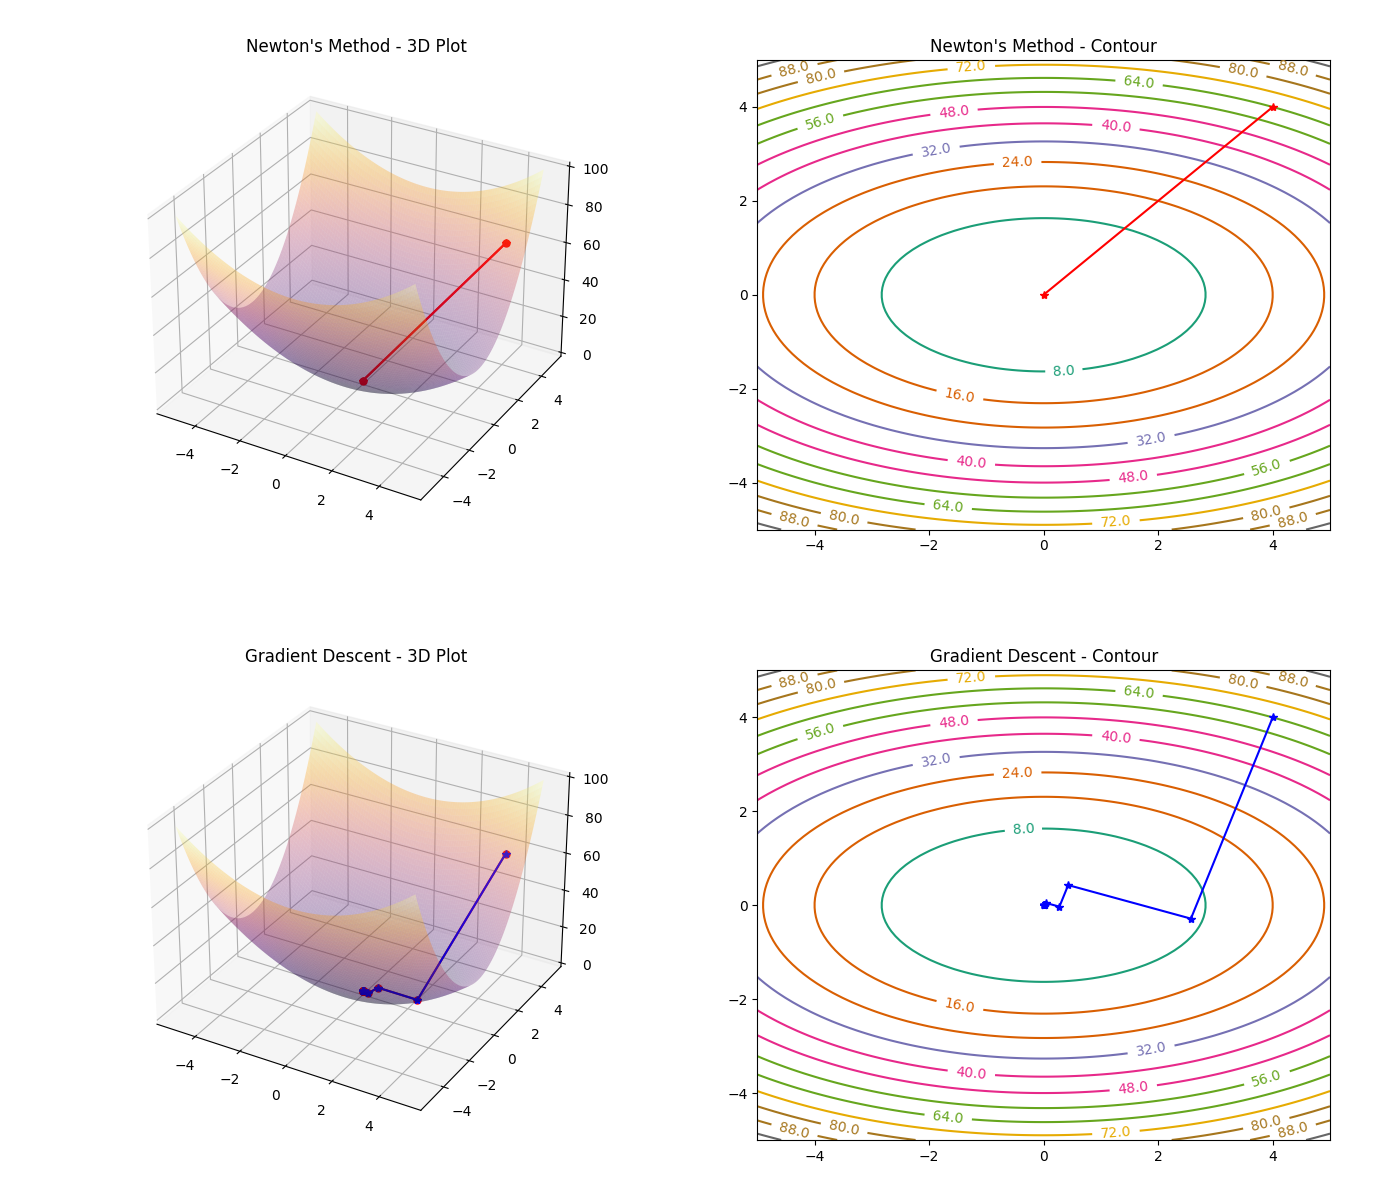

In [13]:
main(f, gradient, hessian_matrix_inverse, optimal_learning_rate, 4, 4)

Newton's Method iterations: 
                x         y    f(x, y)
0   -1.200000e+00  1.000000        NaN
1   -1.105618e+00  0.743483  27.368911
2   -1.043234e+00  0.583232  29.687837
3   -9.972241e-01  0.469738  31.521813
4   -9.612821e-01  0.383961  33.017652
..            ...       ...        ...
286 -1.382519e-06 -0.009481   1.008992
287 -9.323309e-07 -0.009197   1.008460
288 -6.220942e-07 -0.008921   1.007960
289 -4.106173e-07 -0.008653   1.007489
290 -2.680530e-07 -0.008394   1.007046

[291 rows x 3 columns]


Gradient Descent iterations: 
            x         y    f(x, y)
0   -1.200000  1.000000  24.200000
1   -0.984400  1.088000   5.352912
2   -1.027272  1.064209   4.117790
3   -1.026883  1.062424   4.114552
4   -1.026089  1.060837   4.111402
..        ...       ...        ...
771 -0.000602  0.000197   1.001208
772  0.001399  0.000158   0.997206
773  0.003397  0.000127   0.993220
774  0.005390  0.000104   0.989250
775  0.007379  0.000089   0.985296

[776 rows x 3 columns]


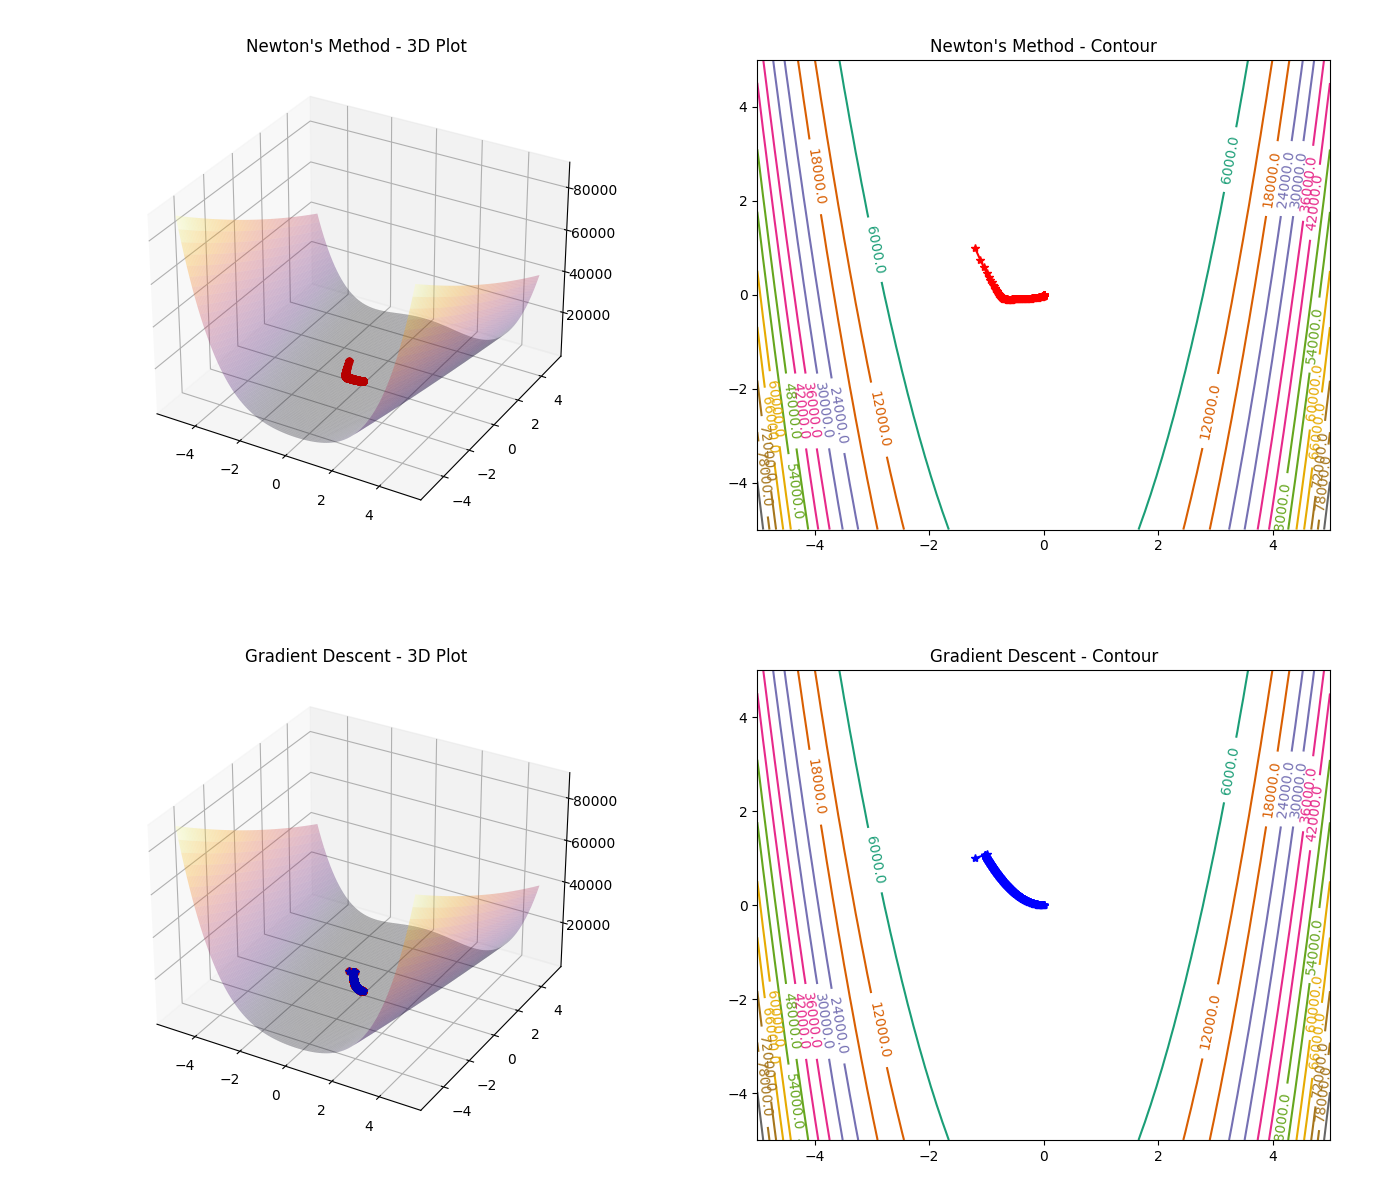

In [14]:
main(rosenbrock, gradient2, hessian_matrix_inverse2, optimal_learning_rate2, -1.2, 1) # learning rate = 0.001